# Tratamento estatístico de dados climatológicos
Baseado nos dados do INMET: https://portal.inmet.gov.br/dadoshistoricos

Carregar a biblioteca de confiabilidade pelo terminal do VS Code: 

        python -m venv myenv
        myenv/bin/pip install reliability

Mudar o kernel para o venv (o VS Code deve reconhecer)

In [4]:
import pandas as pd
import numpy as np
from ipywidgets import interact, interactive
import ipywidgets as widgets
from urllib.request import urlretrieve
from zipfile import ZipFile 
import matplotlib.pyplot as plt
# from reliability.Distributions import Normal_Distribution
# from reliability.Probability_plotting import Normal_probability_plot
# Testando com Scipy - o pacote Reliabiltiy precisa de virtual environment
from scipy import stats

def f(x):
    return x;

# Teste de combobox - a ideia é selecionar um ano e uma estação, baixar o zip do ano e extrair
dpEstacoes = widgets.Dropdown(
    options=[('One', 1), ('Two', 2), ('Three', 3)],
    value=2,
    description='Number:',
)
display(dpEstacoes);
ano = '2023'
estacao = 'SE_RJ_A618_TERESOPOLIS-PARQUE NACIONAL' # checar se a convenção de nome se mantém nos anos
interact(f, x=10);


10

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [16]:
url = 'https://portal.inmet.gov.br/uploads/dadoshistoricos/2023.zip'
arqzip = '2023.zip'
arq = 'INMET_SE_RJ_A618_TERESOPOLIS-PARQUE NACIONAL_01-01-2023_A_31-12-2023.CSV'
urlretrieve(url, arqzip)
with ZipFile(arqzip) as zObject:
    zObject.extract(arq) 

Text(0.5, 1.0, 'Temperatura do ar - bulbo seco')

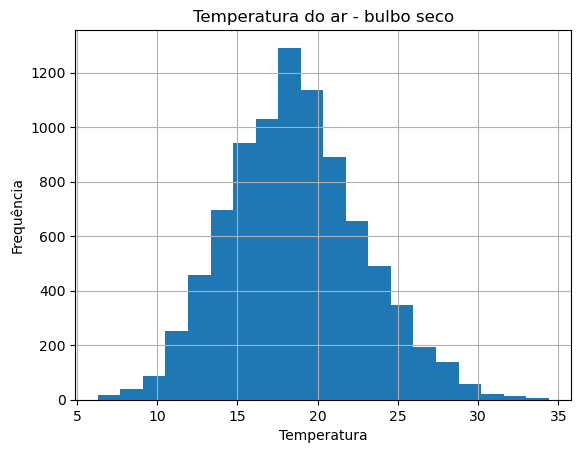

In [17]:
df = pd.read_csv(arq, sep=';', skiprows=8, encoding='latin1', decimal=',')
df.iloc[:,7].hist(bins=20)
plt.xlabel('Temperatura')
plt.ylabel('Frequência')
plt.title('Temperatura do ar - bulbo seco')

Text(0.5, 1.0, 'Velocidade do vento horária')

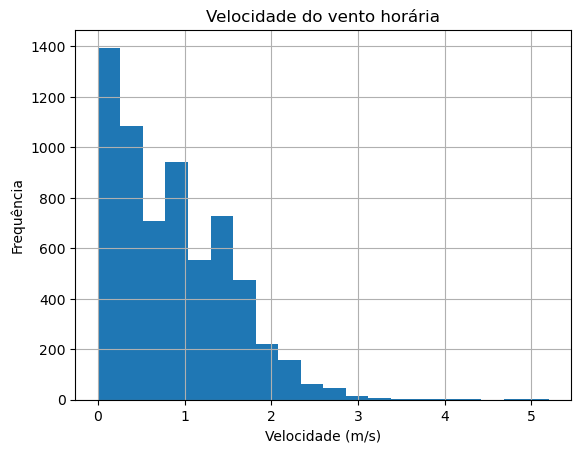

In [36]:
df.iloc[:,18].hist(bins=20)
plt.xlabel('Velocidade (m/s)')
plt.ylabel('Frequência')
plt.title('Velocidade do vento horária')

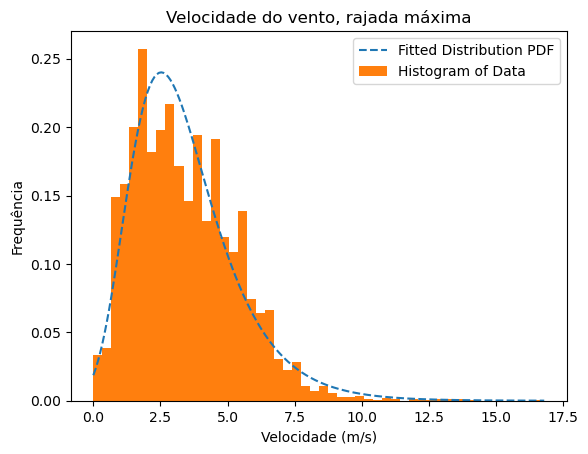

In [63]:
dfRaj = df.iloc[:,17]
dist = stats.gumbel_r
res = stats.fit(dist, dfRaj[np.isfinite(dfRaj)], [(0, 20), (0.5, 5)])
fig, ax = plt.subplots(1,1)
res.plot(ax)
plt.xlabel('Velocidade (m/s)')
plt.ylabel('Frequência')
plt.title('Velocidade do vento, rajada máxima')
plt.show()

(array([ 84., 291., 584., 686., 673., 649., 575., 529., 486., 486., 399.,
        325., 214., 158.,  90.,  53.,  31.,  25.,   9.,   8.,   8.,   3.,
          5.,   2.,   2.,   2.,   3.,   2.,   2.,   0.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. ]),
 <BarContainer object of 30 artists>)

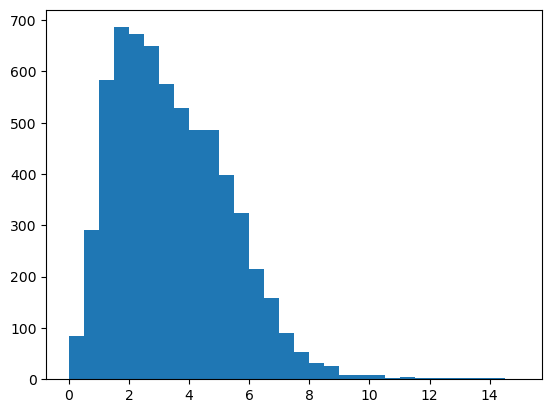

In [61]:
plt.hist(dfRaj, bins=np.arange(0., 15.5, 0.5))